# AVERTISING DATASET

The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.
The sales are in thousands of units and the budget is in thousands of dollars.
To predict the sales of the product in a particular market based on the advertising budgets for different media channels (TV, radio and newspaper) in that market using K-Nearest Neighbors (KNN) regression.

In [1]:
#load the dataset
import csv
from tabulate import tabulate

# Open the CSV file
with open('Advertising.csv', 'r') as file:

    # Create a CSV reader object
    my_reader = csv.reader(file)

    # Convert the CSV data to a list of lists
    data = list(my_reader)

    # Print the data in a tabular format
    print(tabulate(data, headers='firstrow'))

        TV    Radio    Newspaper    Sales
---  -----  -------  -----------  -------
  1  230.1     37.8         69.2     22.1
  2   44.5     39.3         45.1     10.4
  3   17.2     45.9         69.3      9.3
  4  151.5     41.3         58.5     18.5
  5  180.8     10.8         58.4     12.9
  6    8.7     48.9         75        7.2
  7   57.5     32.8         23.5     11.8
  8  120.2     19.6         11.6     13.2
  9    8.6      2.1          1        4.8
 10  199.8      2.6         21.2     10.6
 11   66.1      5.8         24.2      8.6
 12  214.7     24            4       17.4
 13   23.8     35.1         65.9      9.2
 14   97.5      7.6          7.2      9.7
 15  204.1     32.9         46       19
 16  195.4     47.7         52.9     22.4
 17   67.8     36.6        114       12.5
 18  281.4     39.6         55.8     24.4
 19   69.2     20.5         18.3     11.3
 20  147.3     23.9         19.1     14.6
 21  218.4     27.7         53.4     18
 22  237.4      5.1         23.5     1

In [2]:
#to drop zeroth index column as it is of no use in our prediction and also does not effect our dataset.
# and print the new dataset with new file name.

# Open the CSV file for reading and create a new CSV file for writing
with open('Advertising.csv', 'r') as input_file, open('Advertising_new.csv', 'w', newline='') as output_file:
    # Create a CSV reader and writer objects
    reader = csv.reader(input_file)
    writer = csv.writer(output_file)
    
    # Iterate over each row in the input file
    for row in reader:
        # Write all columns except for the first one to the output file
        writer.writerow(row[1:])
        
# Open the new CSV file for reading and print the contents
with open('Advertising_new.csv', 'r') as new_file:
    reader = csv.reader(new_file)
    for row in reader:
        print(row)

['TV', 'Radio', 'Newspaper', 'Sales']
['230.1', '37.8', '69.2', '22.1']
['44.5', '39.3', '45.1', '10.4']
['17.2', '45.9', '69.3', '9.3']
['151.5', '41.3', '58.5', '18.5']
['180.8', '10.8', '58.4', '12.9']
['8.7', '48.9', '75', '7.2']
['57.5', '32.8', '23.5', '11.8']
['120.2', '19.6', '11.6', '13.2']
['8.6', '2.1', '1', '4.8']
['199.8', '2.6', '21.2', '10.6']
['66.1', '5.8', '24.2', '8.6']
['214.7', '24', '4', '17.4']
['23.8', '35.1', '65.9', '9.2']
['97.5', '7.6', '7.2', '9.7']
['204.1', '32.9', '46', '19']
['195.4', '47.7', '52.9', '22.4']
['67.8', '36.6', '114', '12.5']
['281.4', '39.6', '55.8', '24.4']
['69.2', '20.5', '18.3', '11.3']
['147.3', '23.9', '19.1', '14.6']
['218.4', '27.7', '53.4', '18']
['237.4', '5.1', '23.5', '12.5']
['13.2', '15.9', '49.6', '5.6']
['228.3', '16.9', '26.2', '15.5']
['62.3', '12.6', '18.3', '9.7']
['262.9', '3.5', '19.5', '12']
['142.9', '29.3', '12.6', '15']
['240.1', '16.7', '22.9', '15.9']
['248.8', '27.1', '22.9', '18.9']
['70.6', '16', '40.8', '10

In [3]:
# to read the first five lines of a file
with open('Advertising_new.csv', 'r') as file:
    # Read all the lines in the file and store them in a list
    lines = file.readlines()
    
    # Iterate over the last five lines in the list and print them
    for line in lines[:5]:
        print(line.strip())

TV,Radio,Newspaper,Sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5


In [4]:
# to read the last five lines of a file
with open('Advertising_new.csv', 'r') as file:
    # Read all the lines in the file and store them in a list
    lines = file.readlines()
    
    # Iterate over the last five lines in the list and print them
    for line in lines[-5:]:
        print(line.strip())

38.2,3.7,13.8,7.6
94.2,4.9,8.1,9.7
177,9.3,6.4,12.8
283.6,42,66.2,25.5
232.1,8.6,8.7,13.4


In [5]:
# to print the shape of the dataset
with open('Advertising_new.csv', 'r') as file:
    # Count the number of lines in the file
    num_rows = sum(1 for line in file)
    
    # Move the file pointer back to the beginning of the file
    file.seek(0)
    
    # Read the first line in the file, which contains the data types
    data_types = file.readline().strip().split(',')
    
    # Count the number of data types to get the number of columns
    num_cols = len(data_types)
    
    # Print the shape of the dataset
    print("Dataset shape:", num_rows - 1, "rows,", num_cols, "columns")

Dataset shape: 200 rows, 4 columns


In [6]:
# to read the column names of a file 
with open('Advertising_new.csv', 'r') as file:
    # Read the first line in the file, which contains the data types
    data_types = file.readline().strip().split(',')
    print(data_types)

['TV', 'Radio', 'Newspaper', 'Sales']


In [7]:
# to print the count of dataset
with open('Advertising_new.csv', 'r') as file:
    # Read the first line in the file, which contains the column names
    col_names = file.readline().strip().split(',')

    # Initialize a dictionary to store the count of non-empty strings for each column
    col_counts = {}
    for col_name in col_names:
        col_counts[col_name] = 0
    
    # Loop over the remaining lines in the file and count the non-empty strings for each column
    for line in file:
        values = line.strip().split(',')
        for i, value in enumerate(values):
            if value.strip() != '':
                col_counts[col_names[i]] += 1
    
    # Print the count of non-empty strings for each column
    for col_name in col_names:
        print(f"{col_name}: {col_counts[col_name]}")

TV: 200
Radio: 200
Newspaper: 200
Sales: 200


In [8]:
# to print the information of dataset
# Initialize variables
num_rows = 0
num_cols = 0
col_names = []
col_types = {}
memory_usage = 0

# Open the CSV file and read the first line (which contains column names)
with open('Advertising_new.csv', 'r') as file:
    header = file.readline().rstrip('\n')
    col_names = header.split(',')
    num_cols = len(col_names)

    # Loop through each line in the file
    for line in file:
        # Increment the row count
        num_rows += 1
        
    # Iterate over the rows of data to infer the data types
    for row in header:
        num_rows += 1
        for i, value in enumerate(row):
            # Try to convert the value to int
            try:
                int(value)
                if col_types[i] != 'float':
                    col_types[i] = 'int'
            # If it's not an int, try to convert it to float
            except ValueError:
                try:
                    float(value)
                    col_types[i] = 'float'
                # If it's not a float, assume it's a string
                except ValueError:
                    col_types[i] = 'string'


        # Split the line into fields
        fields = line.rstrip('\n').split(',')

        # Update memory usage based on number of fields and their sizes
        memory_usage += sum([len(str(field)) for field in fields])

        

# Print the information about the dataset
print("Total number of rows:", num_rows)
print("Total number of columns:", num_cols)
print("Column names:", col_names)
print("Column data types:", col_types)
print("Memory usage:", memory_usage, "bytes")

Total number of rows: 224
Total number of columns: 4
Column names: ['TV', 'Radio', 'Newspaper', 'Sales']
Column data types: {0: 'string'}
Memory usage: 360 bytes


In [9]:
# to print the description of data set
# Read the CSV file and calculate the summary statistics for each column
with open('Advertising_new.csv', 'r') as file:
    reader = csv.reader(file)
    header = next(reader)  # Get the header row
    data = [[] for _ in range(len(header))]
    for row in reader:
        for i in range(len(row)):#index i used to access the corresponding list in data.
            try:
                data[i].append(float(row[i]))
            except ValueError:
                pass  # placeholder to indicate that no action should be taken

# Print the summary statistics for each column
for i in range(len(header)):
    column_data = data[i]
    count = len(column_data)
    if count == 0:
        continue
    minimum = min(column_data)
    maximum = max(column_data)
    mean = sum(column_data) / count
    variance = sum((x - mean) ** 2 for x in column_data) / count
    std_dev = variance ** 0.5
    print(f"{header[i]}: count={count}, min={minimum}, max={maximum}, mean={mean}, std={std_dev}")

TV: count=200, min=0.7, max=296.4, mean=147.0425, std=85.63933175679271
Radio: count=200, min=0.0, max=49.6, mean=23.264000000000024, std=14.809645640595184
Newspaper: count=200, min=0.3, max=114.0, mean=30.553999999999995, std=21.724106057557357
Sales: count=200, min=1.6, max=27.0, mean=14.022500000000003, std=5.204396578855227


In [10]:
# to print unique values of dataset

# Read the CSV file and count the number of unique values in each column
with open('Advertising_new.csv', 'r') as file:
    reader = csv.reader(file)
    header = next(reader)  # Get the header row
    unique_counts = [set() for _ in range(len(header))]
    for row in reader:
        for i in range(len(row)):
            unique_counts[i].add(row[i])

# Print the number of unique values in each column
for i in range(len(header)):
    column_name = header[i]
    num_unique = len(unique_counts[i])
    print(f"{column_name}: {num_unique} unique values")

TV: 190 unique values
Radio: 167 unique values
Newspaper: 172 unique values
Sales: 121 unique values


In [11]:
# to check total number of duplicated values in dataset
# Load data from file
with open('Advertising_new.csv', 'r') as file:
    data = file.readlines()

# Count the total number of duplicated values
seen = set()
duplicates = 0
for row in data:
    if row in seen:
        duplicates += 1
    else:
        seen.add(row)

# Print the total number of duplicated values
print("Total number of duplicated values: {}".format(duplicates))


Total number of duplicated values: 0


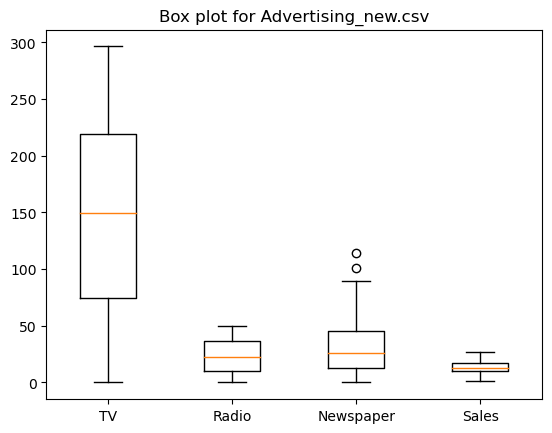

In [17]:
# to visualize the outliers present in the dataset using box-plot
import matplotlib.pyplot as plt

# Open the file and read the data
with open('Advertising_new.csv', 'r') as f:
    data = f.readlines()

# Remove the header row
data = data[1:]

# Create empty lists for TV, Radio, Newspaper and Sales columns
tv = []
radio = []
newspaper = []
sales = []

# Loop through the data and append the values to their respective lists
for row in data:
    row = row.strip().split(',')
    tv.append(float(row[0]))
    radio.append(float(row[1]))
    newspaper.append(float(row[2]))
    sales.append(float(row[3]))

# Create a list of labels for the box plot
labels = ['TV', 'Radio', 'Newspaper', 'Sales']

# Plot the box plot
plt.boxplot([tv, radio, newspaper, sales], labels=labels)
plt.title('Box plot for Advertising_new.csv')
plt.show()

By the above observation we can say that "Newspaper" variable has the outliers present with-in it.

In [18]:
# to impute the outliers present in "Newspaper" column and print the new dataset after imputation
# Open the file and read the data
with open('Advertising_new.csv', 'r') as f:
    data = f.readlines()

# Remove the header row
header = data[0]
data = data[1:]

# Create empty list for Newspaper column
newspaper = []

# Loop through the data and append the values to the Newspaper list
for row in data:
    row = row.strip().split(',')
    newspaper.append(float(row[3]))

# Calculate the mean and standard deviation of the Newspaper column
mean = sum(newspaper) / len(newspaper)
std_dev = (sum([(x - mean) * 2 for x in newspaper]) / len(newspaper)) * 0.5

# Define the threshold as 3 times the standard deviation
threshold = 3 * std_dev

# Replace the outliers with the mean value
for i in range(len(newspaper)):
    if abs(newspaper[i] - mean) > threshold:
        newspaper[i] = mean

# Replace the Newspaper column in the data with the imputed values
new_data = []
new_data.append(header)
for i in range(len(data)):
    row = data[i].strip().split(',')
    row[3] = str(newspaper[i])
    new_data.append(','.join(row) + '\n')

# Write the new data to a file
with open('Advertising_new_imputed.csv', 'w') as f:
    f.writelines(new_data)

print(new_data)

['TV,Radio,Newspaper,Sales\n', '230.1,37.8,69.2,14.022500000000003\n', '44.5,39.3,45.1,14.022500000000003\n', '17.2,45.9,69.3,14.022500000000003\n', '151.5,41.3,58.5,14.022500000000003\n', '180.8,10.8,58.4,14.022500000000003\n', '8.7,48.9,75,14.022500000000003\n', '57.5,32.8,23.5,14.022500000000003\n', '120.2,19.6,11.6,14.022500000000003\n', '8.6,2.1,1,14.022500000000003\n', '199.8,2.6,21.2,14.022500000000003\n', '66.1,5.8,24.2,14.022500000000003\n', '214.7,24,4,14.022500000000003\n', '23.8,35.1,65.9,14.022500000000003\n', '97.5,7.6,7.2,14.022500000000003\n', '204.1,32.9,46,14.022500000000003\n', '195.4,47.7,52.9,14.022500000000003\n', '67.8,36.6,114,14.022500000000003\n', '281.4,39.6,55.8,14.022500000000003\n', '69.2,20.5,18.3,14.022500000000003\n', '147.3,23.9,19.1,14.022500000000003\n', '218.4,27.7,53.4,14.022500000000003\n', '237.4,5.1,23.5,14.022500000000003\n', '13.2,15.9,49.6,14.022500000000003\n', '228.3,16.9,26.2,14.022500000000003\n', '62.3,12.6,18.3,14.022500000000003\n', '2